<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-to-automatically-segment-customers-using-purchase-data-and-a-few-lines-of-Python" data-toc-modified-id="How-to-automatically-segment-customers-using-purchase-data-and-a-few-lines-of-Python-1">How to automatically segment customers using purchase data and a few lines of Python</a></span></li><li><span><a href="#Automatic-Customer-Segmentation-with-RFM-using-Python" data-toc-modified-id="Automatic-Customer-Segmentation-with-RFM-using-Python-2">Automatic Customer Segmentation with RFM using Python</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Why-should-you-care-about-customer-segmentation?" data-toc-modified-id="Why-should-you-care-about-customer-segmentation?-2.0.0.1">Why should you care about customer segmentation?</a></span></li><li><span><a href="#What-technique-are-we-going-to-use?" data-toc-modified-id="What-technique-are-we-going-to-use?-2.0.0.2">What technique are we going to use?</a></span></li><li><span><a href="#Who-are-our-best-customers?" data-toc-modified-id="Who-are-our-best-customers?-2.0.0.3">Who are our best customers?</a></span></li><li><span><a href="#What-data-are-we-using?" data-toc-modified-id="What-data-are-we-using?-2.0.0.4">What data are we using?</a></span></li><li><span><a href="#What-approach-are-we-taking?" data-toc-modified-id="What-approach-are-we-taking?-2.0.0.5">What approach are we taking?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Step-0:-Load,-filter,-clean,-and-aggregate-the-data-at-the-customer-level" data-toc-modified-id="Step-0:-Load,-filter,-clean,-and-aggregate-the-data-at-the-customer-level-3">Step 0: Load, filter, clean, and aggregate the data at the customer level</a></span></li><li><span><a href="#Step-1:-Calculate-the-RFM-metrics-for-each-customer." data-toc-modified-id="Step-1:-Calculate-the-RFM-metrics-for-each-customer.-4">Step 1: Calculate the RFM metrics for each customer.</a></span></li><li><span><a href="#Step-2:-Add-segment-numbers-to-RFM-table." data-toc-modified-id="Step-2:-Add-segment-numbers-to-RFM-table.-5">Step 2: Add segment numbers to RFM table.</a></span></li><li><span><a href="#Step-3:-Calculate-RFM-score-and-sort-customers" data-toc-modified-id="Step-3:-Calculate-RFM-score-and-sort-customers-6">Step 3: Calculate RFM score and sort customers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Add-a-new-column-to-combine-RFM-score:-111-is-the-highest-score-as-we-determined-earlier." data-toc-modified-id="Add-a-new-column-to-combine-RFM-score:-111-is-the-highest-score-as-we-determined-earlier.-6.0.1">Add a new column to combine RFM score: 111 is the highest score as we determined earlier.</a></span><ul class="toc-item"><li><span><a href="#Who-are-the-top-10-of-our-best-customers!" data-toc-modified-id="Who-are-the-top-10-of-our-best-customers!-6.0.1.1">Who are the top 10 of our best customers!</a></span></li></ul></li></ul></li></ul></li></ul></div>

# How to automatically segment customers using purchase data and a few lines of Python

# Automatic Customer Segmentation with RFM using Python

Reproduced from:

- https://github.com/tristanga/Data-Analysis
- https://towardsdatascience.com/how-to-automatically-segment-customers-using-purchase-data-and-a-few-lines-of-python-36939fb587a4
- https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6

Further benefited from:

- https://medium.com/@tomar.ankur287/customer-segmentation-using-rfm-analysis-in-python-bb6f1bd2fce5
- https://github.com/joaolcorreia/RFM-analysis
- https://www.kaggle.com/sarahm/customer-segmentation-using-rfm-analysis

#### Why should you care about customer segmentation?

To deliver personalized experiences to customers, segmentation is key. It can provide insights into your customers behavior, habits, and preferences, allowing you to offer tailored marketing campaigns increasing your odds of success as well as improving your customers experience with tailored content.

#### What technique are we going to use?

We are going to use the RFM model to create the required features from transactional purchasing data. The RFM model stands for:

- **Recency**: Days since last purchase or donation
- **Frequency**: Total number of purchases (or donations)
- **Monetary Value/Sales**: Total spent (or donated)

It’s usually used to identify the Highest Value Customer at the intersection of each 3 questions. Using transactional purchasing data, we will be able to create a **4 x 4 x 4 value matrix to create 64 customers groups**.

![Image of Yaktocat](https://cdn-images-1.medium.com/max/720/1*7JfiT-GBi4R501svnVrQFA.png)

#### Who are our best customers?

- High in monetary & High in frequency & Low in recency (those purchased from us, for example, 10 weeks ago rather than 10 years ago)
- Bought most recently, often, and a lot

#### What data are we using?

We are going to use the purchased sample data set provided by Tableau also known as “Global Superstore”. It is often used for forecasting and time series analysis. It contains more than 1500 different customers and 4 years of purchase data. Since we are doing a **behavioral segmentation** and not a demographic segmentation, we will remove some potential demographic bias by filtering only on the B2C segment (consumer) and the USA country.

#### What approach are we taking?

- Step 0: Load, filter, clean, and aggregate the data at the customer level,
- Step 1: Calculate the RFM metrics for each customer.

![Image of Yaktocat](https://cdn-images-1.medium.com/max/720/1*uqIFE9igGhmxadB_dLz-WQ.png)

- Step 2: Add segment numbers to RFM table.

![Image of Yaktocat](https://cdn-images-1.medium.com/max/720/1*tfHBghAMkF_dUcaQa72tpQ.png)

- Step 3: Sort according to the RFM scores from the best customers (score 111).

![Image of Yaktocat](https://cdn-images-1.medium.com/max/720/1*MeXvFG4Ez0wStMDCXZyN-Q.png)



# Step 0: Load, filter, clean, and aggregate the data at the customer level

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Step 0: Load, filter, clean, and aggregate the data at the customer level
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('/content/drive/My Drive/Materials/GlobalSuperstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
len(df)

51290

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
# select orders where Segment = Consumer and Country = United States

df = df[(df.Segment == 'Consumer') & (df.Country == 'United States')]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical
21,31784,CA-2011-154627,2011-10-29,2011-10-31,First Class,SA-20830,Sue Ann Reed,Consumer,Chicago,Illinois,...,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,2735.952,6,0.2,341.9940,752.51,High
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.42,High
34,32543,CA-2011-168494,2011-12-12,2011-12-14,Second Class,NP-18700,Nora Preis,Consumer,Fresno,California,...,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,3610.848,12,0.2,135.4068,683.12,High


In [11]:
len(df)

5191

# Step 1: Calculate the RFM metrics for each customer.

In [12]:
# latest order date (important for recency)
df['Order Date'].max().date()

datetime.date(2014, 12, 31)

In [13]:
#Step 1: Create RFM Features for each customers
df_RFM = df.groupby('Customer ID').agg({'Order Date': lambda x: (df['Order Date'].max().date() - x.max().date()).days, # Recency
                                        'Order ID': lambda x: len(x.unique()),  # order Frequency
                                        'Sales': lambda x: round(x.sum(),2)})    # Monetary

df_RFM.head()

,Order Date,Order ID,Sales
Customer ID,,,
AA-10315,184,5,5563.56
AA-10375,19,9,1056.39
AA-10480,259,4,1790.51
AA-10645,55,6,5086.93
AB-10015,415,3,886.16


Customer **AA-10315**
- last purchase was 184 days ago
- 5 unique orders so far
- spent $ 5563.56

In [14]:
# rename columns
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

# sort by Monetary (descending)
df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
RB-19360,96,6,15117.34
AB-10105,41,10,14473.57
KL-16645,47,12,14175.23
SC-20095,349,9,14142.33
HL-15040,43,6,12873.30


Customer **RB-19360**
- last purchase was 96 days ago
- 6 unique orders so far
- spent $ 15,117.34

In [15]:
# who is customer RB-19360?

topmoneyspender = df.loc[df['Customer ID'] == 'RB-19360']
topmoneyspender

# each order contains multiple items (or products)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
4923,31746,CA-2013-166674,2013-04-02,2013-04-04,Second Class,RB-19360,Raymond Buch,Consumer,Auburn,New York,...,OFF-AR-10001953,Office Supplies,Art,Boston 1645 Deluxe Heavier-Duty Electric Penci...,263.880,6,0.0,71.2476,67.52000,Critical
5558,31745,CA-2013-166674,2013-04-02,2013-04-04,Second Class,RB-19360,Raymond Buch,Consumer,Auburn,New York,...,OFF-ST-10001469,Office Supplies,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,161.940,3,0.0,9.7164,60.40000,Critical
14843,39450,CA-2014-140151,2014-03-24,2014-03-26,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,20.00054,Medium
22799,31744,CA-2013-166674,2013-04-02,2013-04-04,Second Class,RB-19360,Raymond Buch,Consumer,Auburn,New York,...,OFF-AR-10000588,Office Supplies,Art,Newell 345,59.520,3,0.0,15.4752,9.85000,Critical
23015,34439,CA-2014-162572,2014-09-26,2014-09-28,Second Class,RB-19360,Raymond Buch,Consumer,Cincinnati,Ohio,...,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,119.960,5,0.2,35.9880,9.66000,High
26549,38521,CA-2013-109953,2013-07-15,2013-07-19,Standard Class,RB-19360,Raymond Buch,Consumer,San Francisco,California,...,OFF-AP-10002998,Office Supplies,Appliances,Holmes 99% HEPA Air Purifier,151.620,7,0.0,50.0346,7.26000,Medium
27673,31749,CA-2013-166674,2013-04-02,2013-04-04,Second Class,RB-19360,Raymond Buch,Consumer,Auburn,New York,...,TEC-PH-10002365,Technology,Phones,Belkin Grip Candy Sheer Case / Cover for iPhon...,35.120,4,0.0,9.1312,6.63000,Critical
30039,38520,CA-2013-109953,2013-07-15,2013-07-19,Standard Class,RB-19360,Raymond Buch,Consumer,San Francisco,California,...,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,110.376,3,0.2,12.4173,5.48000,Medium
33666,35256,CA-2013-156573,2013-05-30,2013-06-03,Standard Class,RB-19360,Raymond Buch,Consumer,Nashville,Tennessee,...,FUR-FU-10001085,Furniture,Furnishings,3M Polarizing Light Filter Sleeves,44.760,3,0.2,14.5470,4.03000,Medium
35457,31747,CA-2013-166674,2013-04-02,2013-04-04,Second Class,RB-19360,Raymond Buch,Consumer,Auburn,New York,...,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,30.480,3,0.0,7.9248,3.45000,Critical


In [16]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

# this is for four segmentation of customers in terms of each dimension (R, F, M)
quantiles = df_RFM.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,28.0,5.0,1058.62
0.50,69.0,6.0,2218.98
0.75,184.0,8.0,3635.59


In [17]:
# convert to dictionary
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 28.0, 0.5: 69.0, 0.75: 184.0},
 'Frequency': {0.25: 5.0, 0.5: 6.0, 0.75: 8.0},
 'Monetary': {0.25: 1058.62, 0.5: 2218.98, 0.75: 3635.59}}

Create a segmented RFM table

In [18]:
segmented_rfm = df_RFM
segmented_rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
RB-19360,96,6,15117.34
AB-10105,41,10,14473.57
KL-16645,47,12,14175.23
SC-20095,349,9,14142.33
HL-15040,43,6,12873.30


Lowest recency, highest frequency and monetary are our best customers

# Step 2: Add segment numbers to RFM table.

In [19]:
def RScore(x,p,d):       # recency score ... lower percentile is better and gets 1
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):     # frequency score & monetary score ... higher percentile is better and gets 1
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [20]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [21]:
segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
RB-19360,96,6,15117.34,3,3,1
AB-10105,41,10,14473.57,2,1,1
KL-16645,47,12,14175.23,2,1,1
SC-20095,349,9,14142.33,4,1,1
HL-15040,43,6,12873.30,2,3,1


# Step 3: Calculate RFM score and sort customers

RFM segments split the customer base into an imaginary 3D cube which is hard to visualize. However, we can sort it out.

### Add a new column to combine RFM score: 111 is the highest score as we determined earlier.

In [22]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
RB-19360,96,6,15117.34,3,3,1,331
AB-10105,41,10,14473.57,2,1,1,211
KL-16645,47,12,14175.23,2,1,1,211
SC-20095,349,9,14142.33,4,1,1,411
HL-15040,43,6,12873.30,2,3,1,231


#### Who are the top 10 of our best customers!

In [23]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
SE-20110,9,11,12209.44,1,1,1,111
JL-15835,21,11,9799.92,1,1,1,111
PK-19075,9,12,8646.93,1,1,1,111
LC-16885,16,12,7663.13,1,1,1,111
PO-18850,4,11,7473.83,1,1,1,111
JG-15160,1,11,6366.39,1,1,1,111
WB-21850,20,11,6160.10,1,1,1,111
EP-13915,12,17,5478.06,1,1,1,111
AH-10210,6,9,4805.34,1,1,1,111


In [24]:
segmented_rfm.groupby('RFMScore').size()

RFMScore
111    17
112     7
113     4
114     1
121    14
122    11
123    11
124     1
131     3
132     5
133     3
141     2
142     3
143     5
144    16
211    11
212    10
213     5
221     6
222     7
223     5
224     3
231     5
232     9
233     4
234     3
241     7
242     4
243     8
244    15
311     5
312     7
313     3
314     1
321    11
322    11
323     8
324     1
331     2
332     4
333     7
334     7
341     4
342     3
343    10
344    18
411     5
413     4
421     4
422     1
423     2
424     2
431     2
432     3
433     5
434     4
441     4
442    17
443    18
444    31
dtype: int64

<Axes: xlabel='RFMScore'>

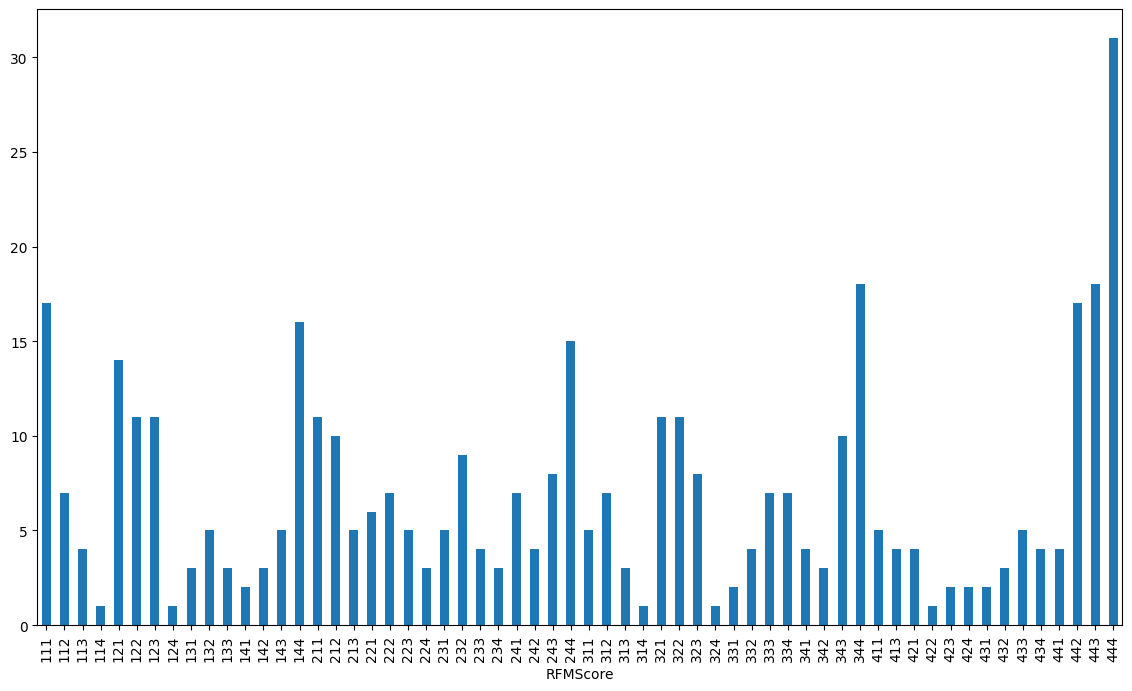

In [25]:
plt.figure(figsize=(14,8))
segmented_rfm.groupby('RFMScore').size().plot(kind='bar')

In [26]:
segmented_rfm.groupby('RFMScore').mean()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
RFMScore,,,,,,
111,12.058824,10.823529,6026.304706,1.0,1.0,1.0
112,15.285714,9.714286,2767.631429,1.0,1.0,2.0
113,19.000000,10.000000,1639.722500,1.0,1.0,3.0
114,19.000000,9.000000,1056.390000,1.0,1.0,4.0
121,17.714286,7.285714,4832.414286,1.0,2.0,1.0
122,15.909091,7.454545,2803.785455,1.0,2.0,2.0
123,20.000000,7.545455,1566.120909,1.0,2.0,3.0
124,6.000000,8.000000,945.220000,1.0,2.0,4.0
131,19.000000,6.000000,5760.320000,1.0,3.0,1.0
